In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('academic_performance.csv')


In [17]:
df.sample(5)

,gender,math score,reading score,writing score,placement score,club join date,placement offer count
12,female,71.0,160.0,76.0,93.0,2019,3
1,male,64.0,89.0,71.0,79.0,2021,2
29,male,62.0,84.0,NaN,94.0,2019,1
2,female,76.0,90.0,62.0,99.0,2019,3
3,male,NaN,81.0,70.0,91.0,2019,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 31 non-null     object 
 1   math score             29 non-null     float64
 2   reading score          29 non-null     float64
 3   writing score          28 non-null     float64
 4   placement score        29 non-null     float64
 5   club join date         31 non-null     int64  
 6   placement offer count  31 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ KB


In [19]:
df['club join date'] = pd.to_datetime(df['club join date'], format='%Y')
df['club join date'].dtype

dtype('<M8[ns]')

In [20]:
df.describe()

,math score,reading score,writing score,placement score,club join date,placement offer count
count,29.000000,29.000000,28.000000,29.000000,31,31.000000
mean,59.310345,88.034483,71.714286,87.620690,2019-09-17 07:44:30.967741952,1.903226
min,-99.000000,65.000000,60.000000,60.000000,2018-01-01 00:00:00,1.000000
25%,63.000000,81.000000,65.000000,79.000000,2019-01-01 00:00:00,1.000000
50%,67.000000,87.000000,71.000000,91.000000,2020-01-01 00:00:00,2.000000
75%,73.000000,91.000000,76.000000,94.000000,2021-01-01 00:00:00,3.000000
max,100.000000,160.000000,90.000000,120.000000,2021-01-01 00:00:00,3.000000
std,43.769774,15.573519,7.840338,11.766823,NaN,0.870051


In [21]:
df.isnull().any()

gender                   False
math score                True
reading score             True
writing score             True
placement score           True
club join date           False
placement offer count    False
dtype: bool

In [22]:
columns_to_fill = ['math score', 'reading score', 'writing score', 'placement score']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].median())

df.isnull().any()

gender                   False
math score               False
reading score            False
writing score            False
placement score          False
club join date           False
placement offer count    False
dtype: bool

In [23]:
# Handle negative values in 'math score'
df['math score'] = df['math score'].apply(lambda x: df['math score'].median() if x < 0 else x)

# Cap high values in 'reading score'
df['reading score'] = df['reading score'].apply(lambda x: 100 if x > 100 else x)
df['placement score'] = df['placement score'].apply(lambda x: 100 if x > 100 else x)


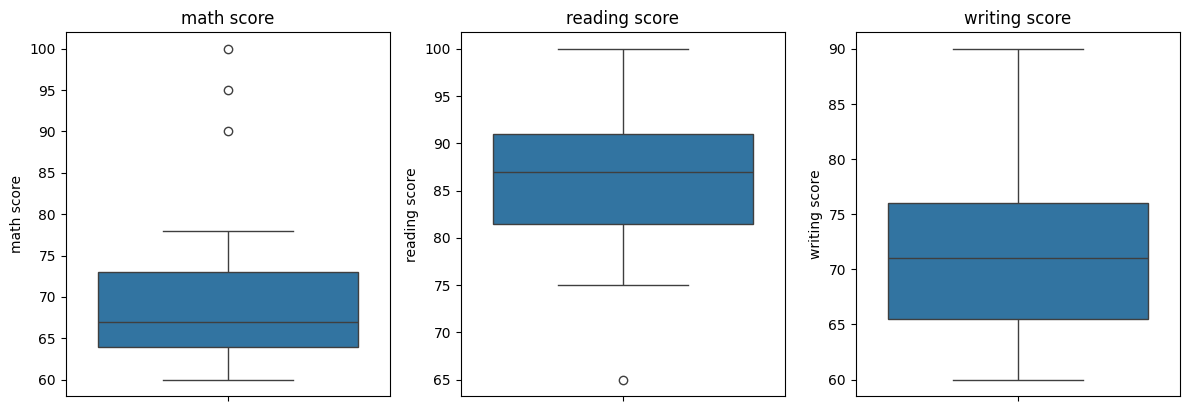

In [24]:

# Identify numeric columns
# df_numeric = df.select_dtypes(exclude=['object'])
df_numeric = df[['math score','reading score','writing score']]

# Plotting boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

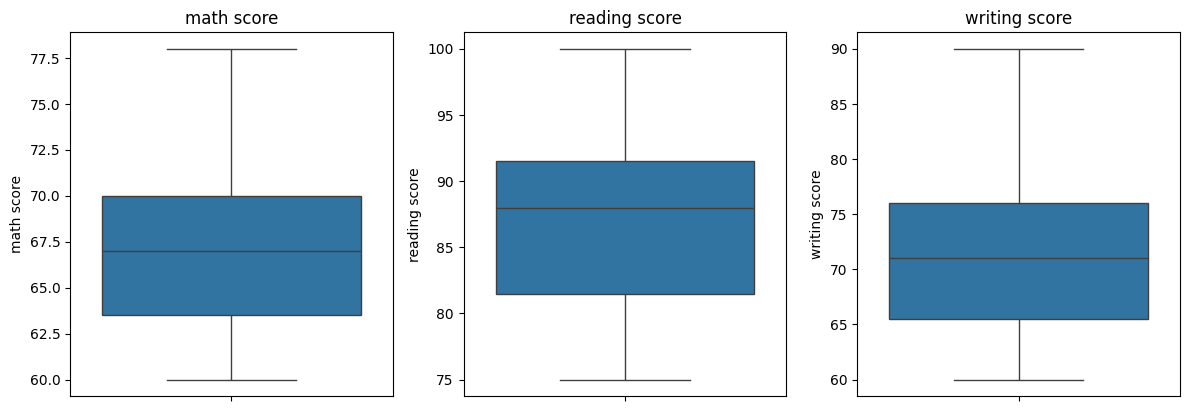

In [25]:
# Removing outliers based on previously calculated bounds
for column in df_numeric.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Plotting boxplots for each numeric column after outlier removal
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Original skewness of math score: 0.5622077191513933
After transformation skewness of math score: 0.42906342084030075


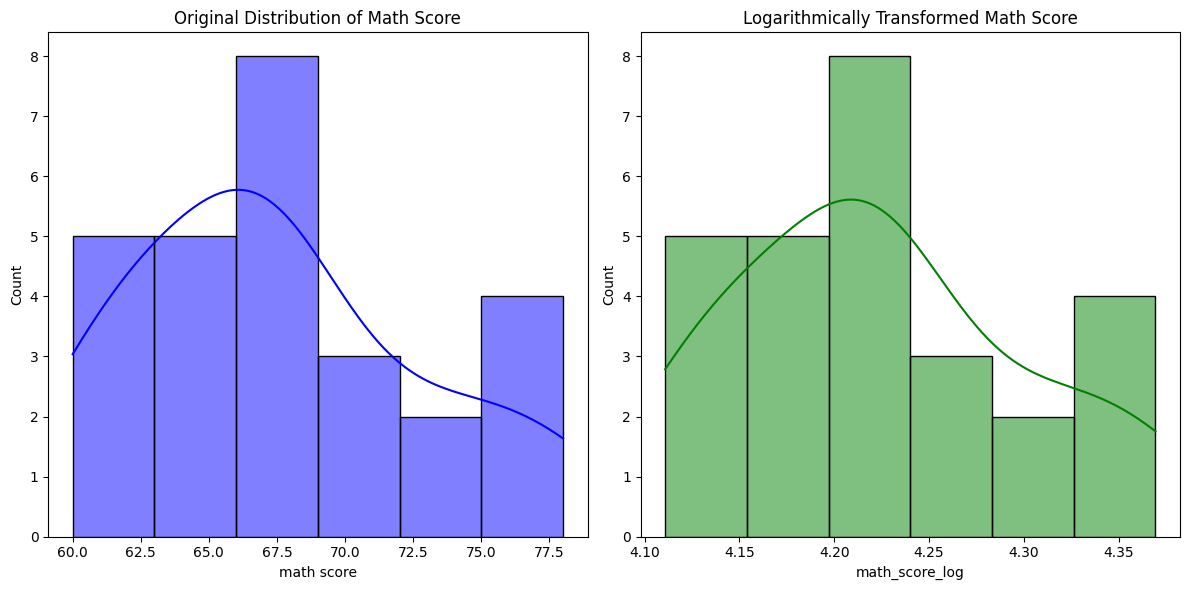

In [32]:

# Calculate skewness of the 'math score'
skewness_original = df['math score'].skew()
print(f'Original skewness of math score: {skewness_original}')

# Applying logarithmic transformation to 'math score'
df['math_score_log'] = np.log1p(df['math score'])  # log1p is log(x+1) to handle zero values

skewness_after_transformation = df['math_score_log'].skew()
print(f'After transformation skewness of math score: {skewness_after_transformation}')

# Plotting the original and logarithmically transformed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Original Distribution of Math Score')

plt.subplot(1, 2, 2)
sns.histplot(df['math_score_log'], kde=True, color='green')
plt.title('Logarithmically Transformed Math Score')

plt.tight_layout()
plt.show()

```if skewness_original > 1:
    # Apply log transformation if highly skewed
    df['math_score_log'] = np.log(df['math score'] + 1)  # Adding 1 to avoid log(0)
    transformation = 'logarithmic'
elif skewness_original > 0.5:
    # Apply square root transformation if moderately skewed
    df['math_score_sqrt'] = np.sqrt(df['math score'])
    transformation = 'square root'
else:
    # Apply Box-Cox transformation if slightly skewed
    df['math_score_boxcox'], _ = stats.boxcox(df['math score'] + 1)  # Adding 1 to handle zero values
    transformation = 'Box-Cox'```

Logarithmic Transformation:

    Useful for data with exponential growth or heavy right skewness.
    Helps in stabilizing variance and normalizing the distribution.

Square Root Transformation:

    Suitable for moderately skewed data.
    Reduces the impact of outliers and can help in normalizing data.

Inverse Transformation:

    Can be applied to data where higher values are less frequent but highly influential.
    Useful in converting exponential decay to a linear form.

Power Transformations (Box-Cox and Yeo-Johnson):

    Box-Cox requires positive values, useful for making data more normal.
    Yeo-Johnson supports both positive and negative values, extending the Box-Cox method.

Standardization (Z-score Normalization):

    Centers the data around the mean with a standard deviation of 1.
    Useful in machine learning models that assume data is normally distributed.

Min-Max Scaling:

    Transforms features to a given range, typically 0 to 1.
    Useful in preserving the shape of the original distribution while scaling to a specific range.

